# FCA analysis - clusters identification and characterization

In [64]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import os
import sys

def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = './figures/clustering/'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

-----
anndata     0.7.5
scanpy      1.7.0rc1
sinfo       0.3.1
-----
PIL                 8.1.2
anndata             0.7.5
anyio               NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bamnostic           NA
brotli              NA
cairo               1.20.0
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.03.0
dateutil            2.8.1
decorator           4.4.2
episcanpy           0.3.1
get_version         2.1
google              NA
h5py                3.1.0
idna                2.10
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.4.1
jupyterlab_server   2.3.0


'/opt/conda/bin/python'

## Load data

In [65]:
adata = sc.read('FCA-M2harmony_theta0.h5ad')
adata.X.shape

(319081, 28037)

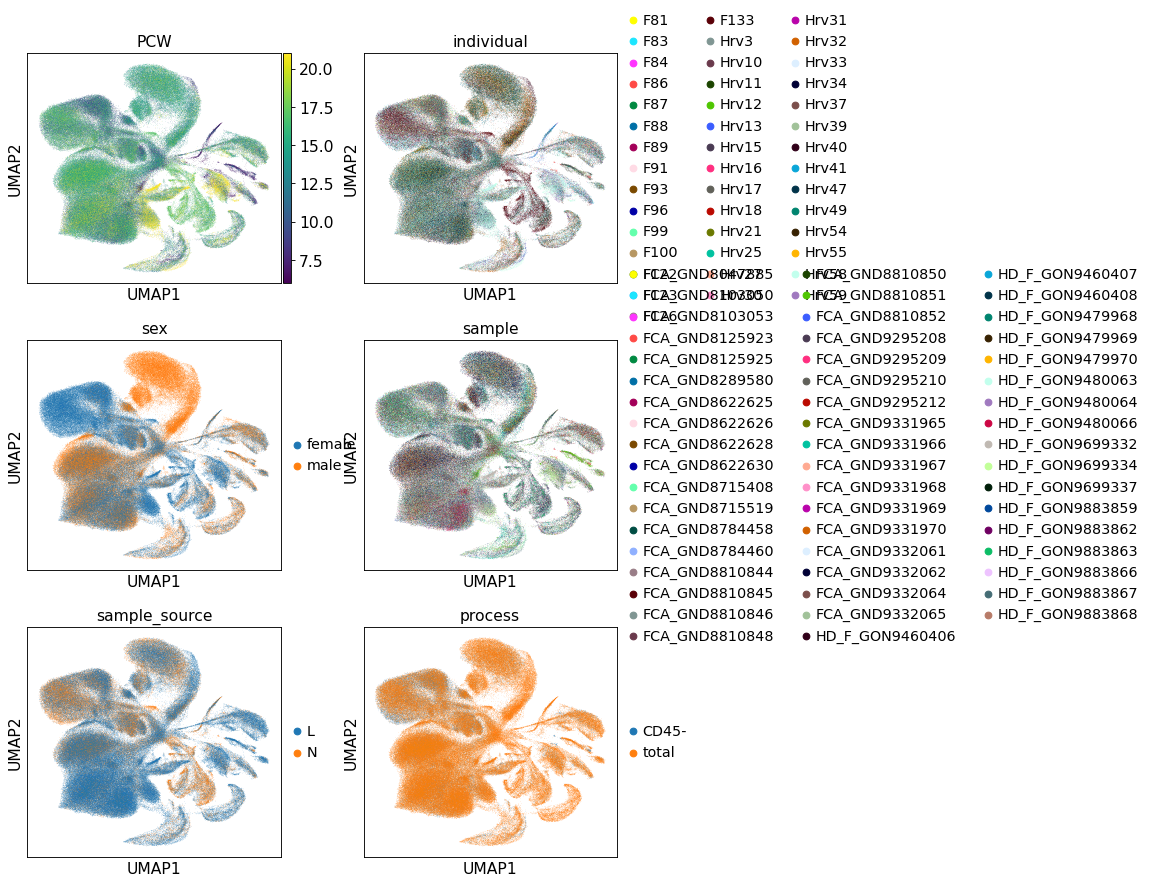

In [66]:
sc.pl.umap(adata, color=['PCW', 'individual', 'sex', 'sample', 'sample_source', 'process'], ncols=2)

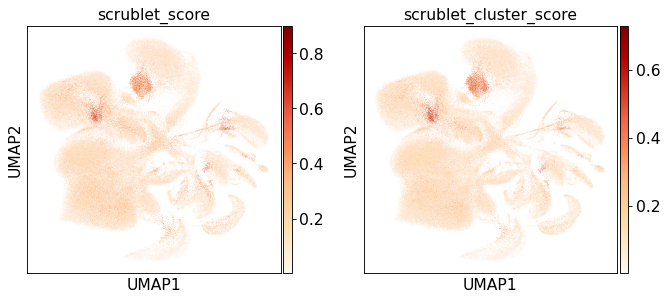

In [37]:
sc.pl.umap(adata, color=['scrublet_score', 'scrublet_cluster_score'], color_map='OrRd')

## Clustering the graph
As Seurat and many others, we use the Louvain graph-clustering method (community detection based on optimizing modularity). It has been proposed for single-cell data by Levine et al. (2015).

In [38]:
sc.tl.louvain(adata, resolution=0.2)


running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 15 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:01:08)


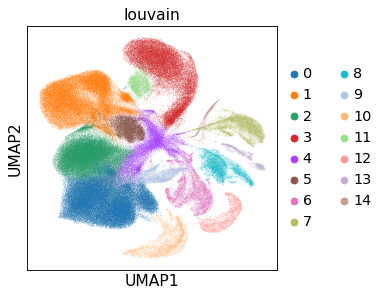

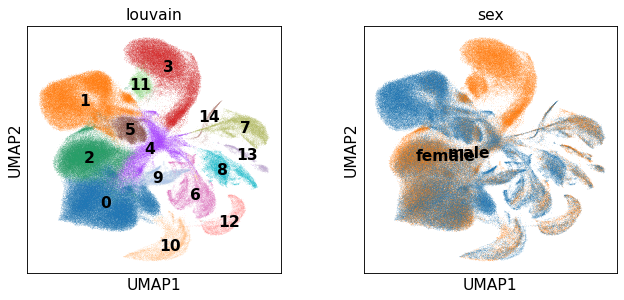

In [39]:
sc.pl.umap(adata, color='louvain' )
sc.pl.umap(adata, color=['louvain', 'sex'],legend_loc='on data',save='_clustering_clusnumbers.pdf' )

Re-cluster some regions

In [40]:
# sc.tl.louvain(adata, resolution=0.05, restrict_to=('louvain', ['2']))
# sc.pl.umap(adata, color='louvain_R',legend_loc='on data',save='_clustering_clusnumbers.pdf' )
# adata.obs['louvain_R'].cat.categories = [str(i) for i in range(len(adata.obs['louvain_R'].cat.categories))]
# adata.obs['louvain'] = adata.obs['louvain_R']
# sc.pl.umap(adata, color='louvain',legend_loc='on data',save='_clustering_clusnumbers.pdf' )

... storing 'sub_clusters' as categorical


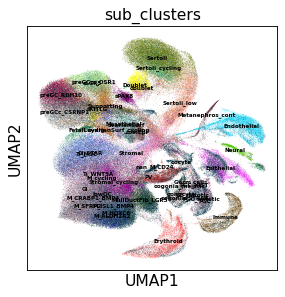

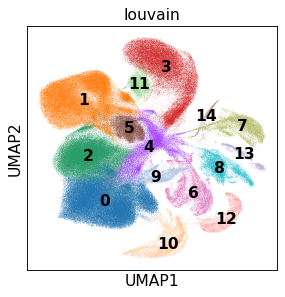

In [41]:
# Add old cluster subname
meta_som = pd.read_csv('/nfs/team292/lg18/with_valentina/gonadsV1_freezed/supporting_annotated.csv')
meta_som = meta_som.set_index('Unnamed: 0')
meta_som.head()

meta_germ = pd.read_csv('/nfs/team292/lg18/with_valentina/gonadsV1_freezed/germcells_annotated.csv')
meta_germ = meta_germ.set_index('Unnamed: 0')
meta_germ.head()

meta_mes = pd.read_csv('/nfs/team292/lg18/with_valentina/gonadsV1_freezed/mesenchymalPV_annotated.csv')
meta_mes = meta_mes.set_index('Unnamed: 0')
meta_mes.head()

som_cell_annot = meta_som['annotated_clusters'].to_dict()
germ_cell_annot = meta_germ['annotated_clusters'].to_dict()
mes_cell_annot = meta_mes['annotated_clusters'].to_dict()
cell_annot = {**som_cell_annot, **germ_cell_annot, **mes_cell_annot}
adata.obs['sub_clusters'] = adata.obs_names.map(cell_annot)

# Replace NaN with big clusters 
adata.obs['sub_clusters'] = adata.obs['sub_clusters'].fillna(adata.obs['clusters'])
sc.pl.umap(adata, color=['sub_clusters'], ncols = 4, color_map='OrRd', use_raw=False, legend_loc='on data', legend_fontsize=5)
sc.pl.umap(adata, color='louvain',legend_loc='on data',save='_clustering_clusnumbers.pdf' )

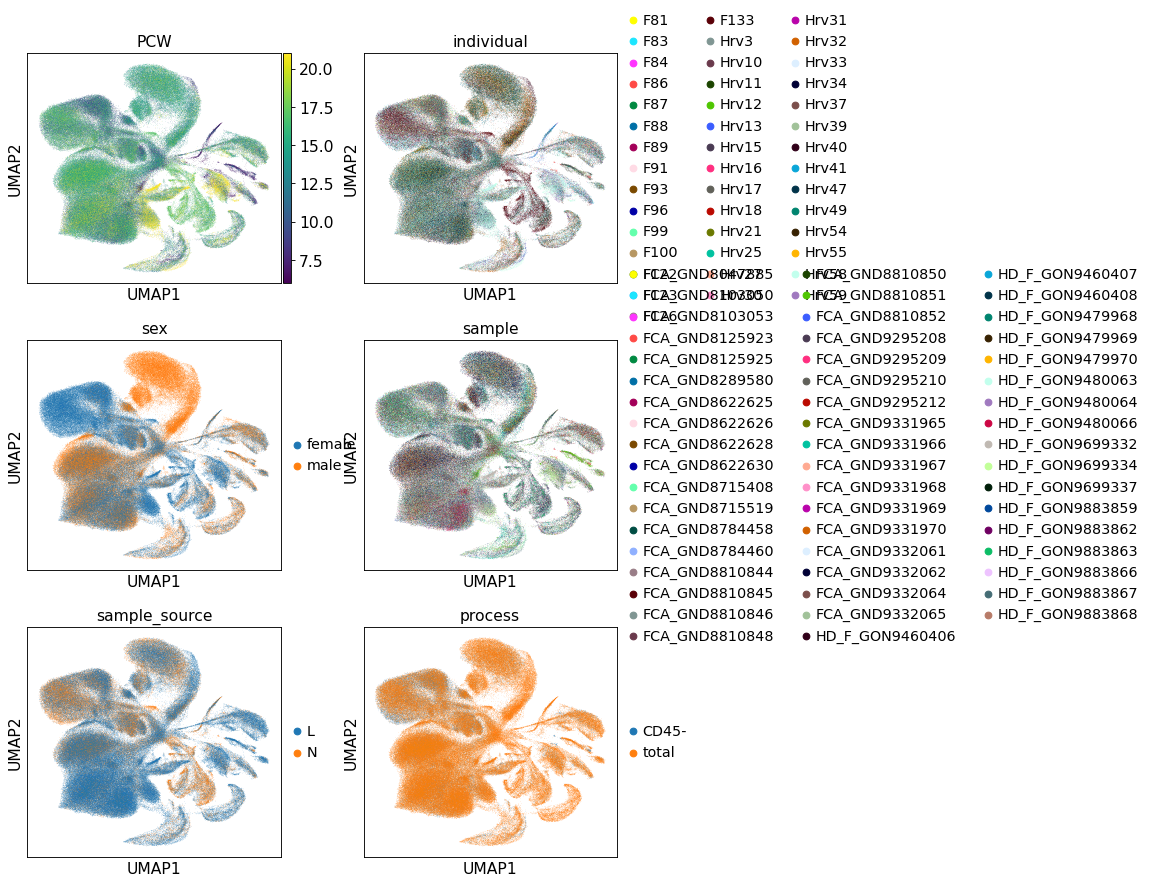

In [42]:
sc.pl.umap(adata, color=['PCW', 'individual', 'sex', 'sample', 'sample_source', 'process'], ncols=2)

### Visualize general markers

In [43]:
# sc.pl.umap(adata, color=["POU5F1", "NANOS3", "FIGLA", 'DAZL'], save='-markers_germcell.pdf',color_map='OrRd', use_raw=True )
# sc.pl.umap(adata, color=['NR2F2', 'DCN', 'TCF21', 'LGR5', 'COL1A2', 'OSR1'], save='-markers_stromal.pdf',color_map='OrRd', use_raw=True )
# sc.pl.umap(adata, color=["WNT6", 'NR5A1', "SOX9", 'FOXL2'], save='-markers_supporting.pdf',color_map='OrRd', use_raw=True )
# sc.pl.umap(adata, color=["EPCAM", "KRT19", 'KLK11', 'PAX8'], save='-markers_epithelial.pdf',color_map='OrRd', use_raw=True )
# sc.pl.umap(adata, color=['ASCL1'], save='-markers_neural.pdf',color_map='OrRd', use_raw=True )
# sc.pl.umap(adata, color=['PECAM1', 'VWF', 'CDH5'], save='-markers_endothelial.pdf',color_map='OrRd', use_raw=True )
# sc.pl.umap(adata, color=['PTPRC'], save='-markers_immuneCD45.pdf',color_map='OrRd', use_raw=True )
# sc.pl.umap(adata, color=['PRL', 'CRABP1'], save='-markers_unknown.pdf',color_map='OrRd', use_raw=True )
# sc.pl.umap(adata, color=["GYPC", "HBA1"], save='-markers_erythroid.pdf',color_map='OrRd', use_raw=True )
# sc.pl.umap(adata, color=["PDGFRB", 'ACTA2'], save='-markers_perivascula.pdf',color_map='OrRd', use_raw=True )
# sc.pl.umap(adata, color=['DES'], save='-markers_smoothmusclecell.pdf',color_map='OrRd', use_raw=True )
# sc.pl.umap(adata, color=['LGR5'], save='-markers_somaProgenitors.pdf',color_map='OrRd', use_raw=True )
# sc.pl.umap(adata, color=['LRRN4', 'UPK3B'], save='-markers_mesothelial.pdf',color_map='OrRd', use_raw=True )
# sc.pl.umap(adata, color=['INSL3', 'GLI1', 'HHIP', 'PTCH2'], save='-markers_Leydig.pdf',color_map='OrRd', use_raw=True )
# sc.pl.umap(adata, color=['MKI67', 'CDK1'], save='-markers_cycling.pdf',color_map='OrRd', use_raw=True)

Check the germ cells

In [44]:
PGCS_cl = ['6']

PGCs_our = [i for i in adata.obs['louvain'].values if i in PGCS_cl ]
print('Number of PGCs in our analysis: ', len(PGCs_our))
pgcs_obs = adata.obs[ np.asarray([i in PGCS_cl for i in adata.obs['louvain'].values])]
print('Number of PGCs per individual:')
pgcs_obs['stage'].values.describe()

Number of PGCs in our analysis:  11388
Number of PGCs per individual:


counts     freqs
categories                  
6.0              5  0.000439
7.0              4  0.000351
7.5              0  0.000000
8.4              7  0.000615
8.6             18  0.001581
8.8             18  0.001581
9.0            202  0.017738
10.0           340  0.029856
11.0           120  0.010537
12.0           493  0.043291
13.0           427  0.037496
14.0           287  0.025202
15.0          1791  0.157271
16.0           450  0.039515
17.0          5159  0.453021
18.0           585  0.051370
19.0           818  0.071830
21.0           664  0.058307

In [45]:
print('Number of PGCs per sex:')
pgcs_obs['sex'].values.describe()

Number of PGCs per sex:


counts     freqs
categories                  
female        8281  0.727169
male          3107  0.272831

In [46]:
print('Number of PGCs per donor:')
pgcs_obs['individual'].values.describe()

Number of PGCs per donor:


counts     freqs
categories                  
F81             18  0.001581
F83            406  0.035652
F84              3  0.000263
F86              0  0.000000
F87             16  0.001405
F88             93  0.008166
F89              7  0.000615
F91              2  0.000176
F93              0  0.000000
F96              4  0.000351
F99             15  0.001317
F100            71  0.006235
F122          1701  0.149368
F123             5  0.000439
F126           184  0.016157
F133          4721  0.414559
Hrv3           818  0.071830
Hrv10           10  0.000878
Hrv11           96  0.008430
Hrv12            1  0.000088
Hrv13            5  0.000439
Hrv15            0  0.000000
Hrv16            0  0.000000
Hrv17            4  0.000351
Hrv18            5  0.000439
Hrv21           12  0.001054
Hrv25            8  0.000702
Hrv27            1  0.000088
Hrv30          425  0.037320
Hrv31            9  0.000790
Hrv32           63  0.005532
Hrv33           38  0.003337
Hrv34          379  0.033281
Hrv37          340  0.029856
Hrv39          178  0.015630
Hrv40           52  0.004566
Hrv41            2  0.000176
Hrv47            0  0.000000
Hrv49          427  0.037496
Hrv54          200  0.017562
Hrv55           20  0.001756
Hrv58          464  0.040745
Hrv59          585  0.051370

### Check global trends

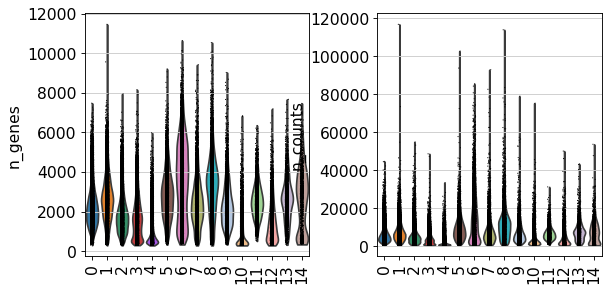

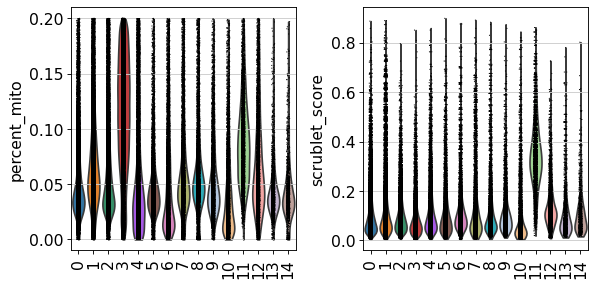

In [47]:
sc.pl.violin(adata, keys= ['n_genes', 'n_counts'], groupby = 'louvain', save='_clusters_statsI.pdf', rotation = 90)
sc.pl.violin(adata, keys= ['percent_mito', 'scrublet_score'], groupby = 'louvain', save='_clusters_statsII.pdf', rotation = 90)

## Save adata

In [48]:
# del(adata.uns['neighbors'])
adata.write('FCA-M3clusters.h5ad')

# Finding marker genes

Compute a ranking for the highly differential genes in each cluster. Here, we simply rank genes with a t test, which agrees quite well with Seurat.

## All vs rest

### TF-IDF based

In [49]:
adata_counts = anndata.AnnData(X=adata.raw.X, var=adata.raw.var, obs=adata.obs, asview=False)

In [50]:
# Binarize counts matrix (1 if expressed, 0 otherwise)
import episcanpy as epi
adata_bin = epi.pp.binarize(adata_counts, copy=True)
adata_bin.X.shape
# Compute TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(adata_bin.X.T)
adata_bin.X = tfidf.T
adata_bin.X.shape

(319081, 28230)

In [51]:
#Compute Mann-Withney test with scanpy
sc.tl.rank_genes_groups(adata_bin, groupby='louvain', use_raw=False) #, method='logreg'

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:02:10)


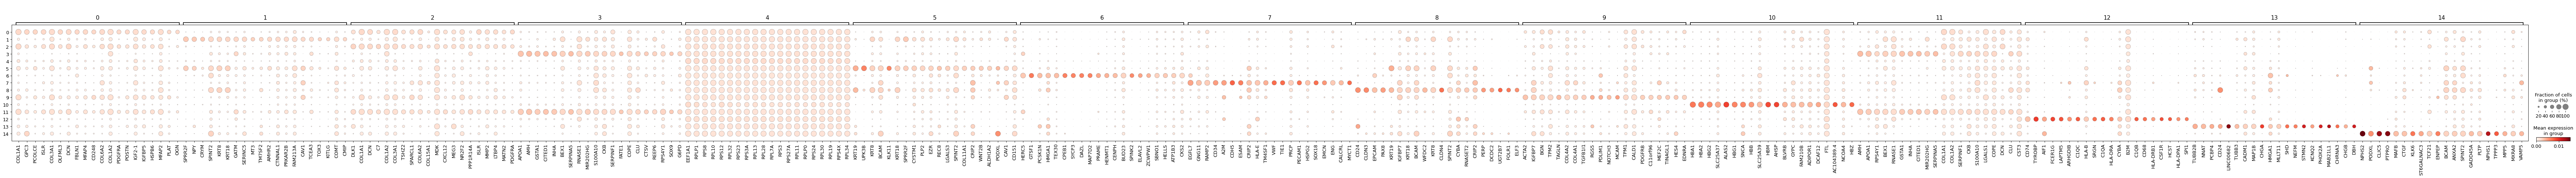

In [52]:
#Plot TF-IDF values
sc.pl.rank_genes_groups_dotplot(adata_bin, n_genes=20, dendrogram=False, save='_rawtfidf_scanpy.pdf')

In [53]:
# # Plot with gene expression normalized values
# sc.pp.scale(adata, max_value=10)

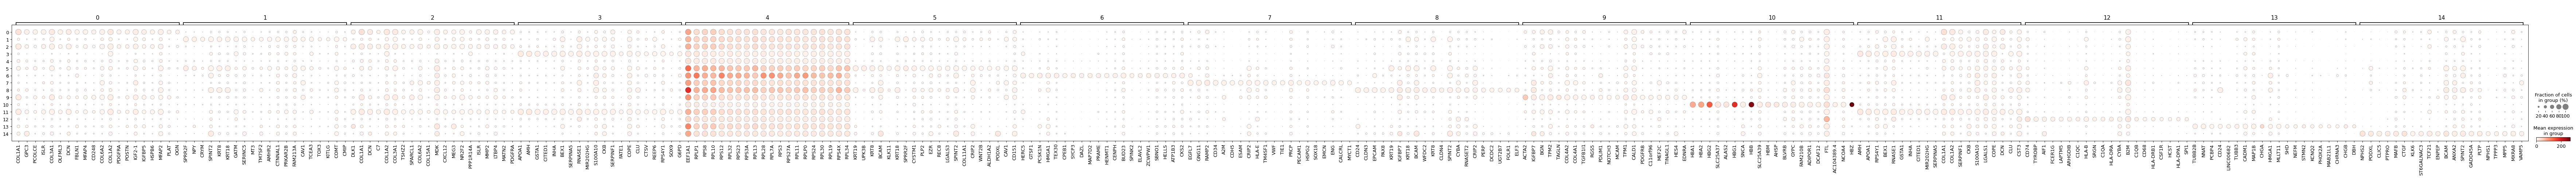

In [54]:
adata.uns['rank_genes_groups'] = adata_bin.uns['rank_genes_groups']
sc.pl.rank_genes_groups_dotplot(adata, n_genes=20, dendrogram=False, save='_tfidf_scanpy.pdf', use_raw = True)

In [55]:
def Barplot(which_var, adata, var='clusters', height=3, color = False):
    plotdata = pd.crosstab(adata.obs[var], adata.obs[which_var], normalize='index') * 100
    if 'category' in plotdata.index.dtype.name:
        plotdata.index.reorder_categories(adata.obs[var].cat.categories[::-1])

    if not color:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False)
    else:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False, color = color)
    ax1.set_title(which_var+' %')
    ax1.set_ylabel(var)
    horiz_offset = 1
    vert_offset = 1.
    ax1 = ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset))
    ax1.figure.savefig(str(sc.settings.figdir)+'/barplot_'+var+'_proportions_'+which_var+'.pdf', bbox_inches='tight',
                       dpi=300, orientation='landscape', format= 'pdf', optimize=True)

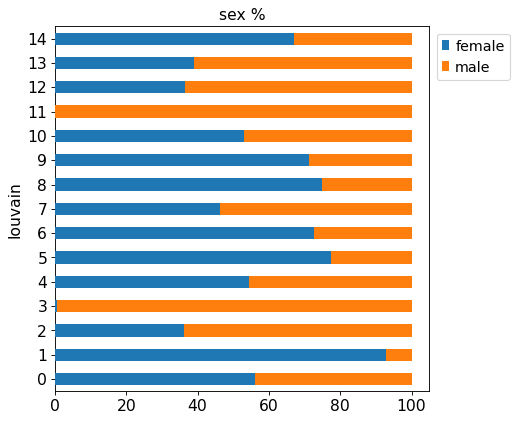

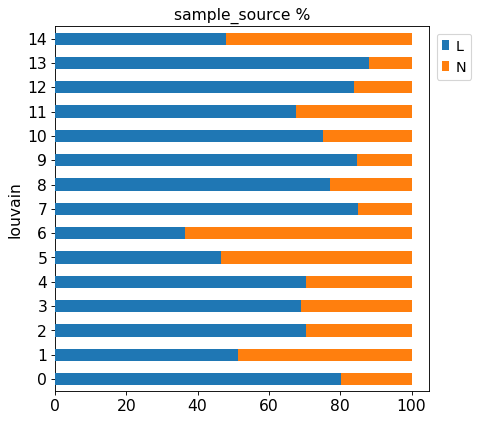

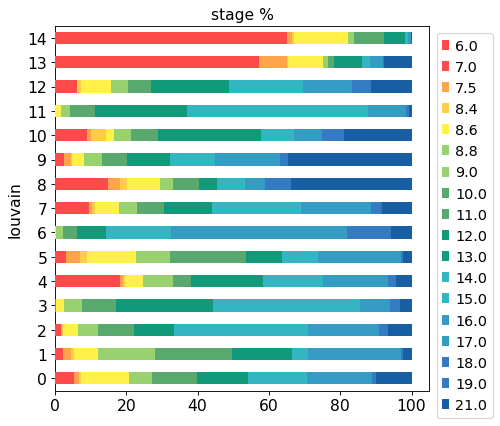

In [56]:
Barplot('sex', adata, var='louvain', height=6)
Barplot('sample_source', adata, var='louvain', height=6)
Barplot('stage', adata, var='louvain', height=6, color = ['#ff4a4a', '#ff4a4a', '#ffa44a', '#ffcc4a', '#fff04a', '#98d16d', '#98d16d', '#59a86e','#59a86e', '#119979', '#119979', '#34b6c2', '#34b6c2', '#349cc2', '#349cc2', '#347bc2', '#347bc2', '#185ea3', '#1e1585'])

In [57]:
marker_genes = {
    'Sertoli': {'SOX9', 'INHBB', 'DHH', 'CLDN11'},
    'Female supporting':{"KITLG", 'FOXL2', 'RSPO1', 'OSR1'},
    'Supporting':{"WNT6", 'NR5A1'},
    'Stromal':{'COL1A2', 'DCN', 'PDGFRA'},
    'Leydig':{'INSL3', 'GLI1', 'HHIP', 'PTCH2', 'FDX1'},
    'PGCs': {'POU5F1', 'NANOG', 'NANOS3', 'KIT'},
    'Germ Cells': {'DAZL', 'SPO11'},
    'epithelial': {"EPCAM", "KRT19", 'PAX8'},
    'neural': {'ASCL1'},
    'endothelial': {'PECAM1', 'VWF', 'CDH5'},
    'immune': {'PTPRC'},
    'erythroid': {"GYPC", "HBA1"},
    'perivascular': {"PDGFRB", 'ACTA2'},
    'erythroid': {"GYPC", "HBA1"},
    'mesothelial': {'LRRN4', 'UPK3B'},
    'cycling': {'CDK1', 'MKI67', 'TOP2A'}
}

In [58]:
marker_matches = sc.tl.marker_gene_overlap(adata_bin, marker_genes, method = 'overlap_coef')
marker_matches = marker_matches.set_axis('cl_'+marker_matches.columns, axis=1, inplace=False)

<AxesSubplot:>

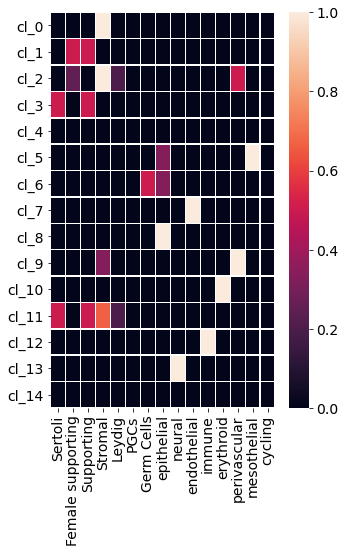

In [59]:
from pandas import DataFrame
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,7))  
sns.heatmap(marker_matches.T, annot=False, xticklabels=True, yticklabels=True, linewidths=0.5, ax= ax)

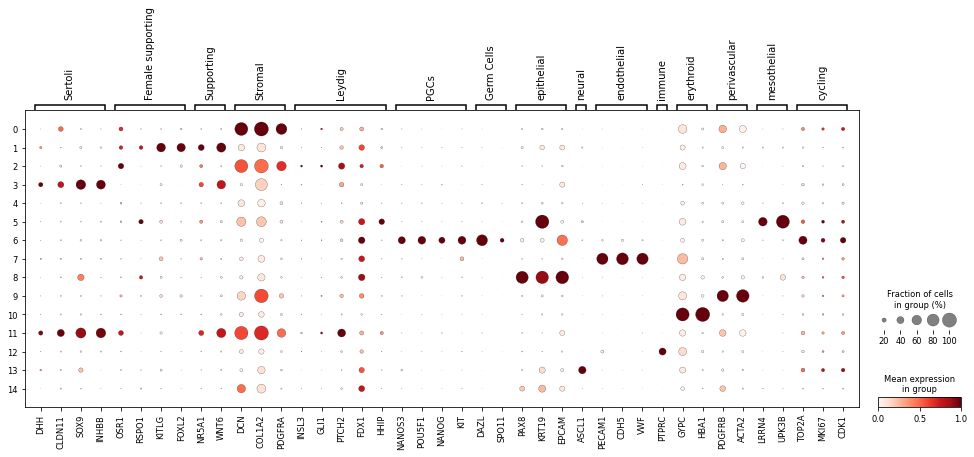

In [60]:
sc.pl.dotplot(adata_counts, marker_genes, groupby='louvain', standard_scale='var')

In [61]:
def Barplot(which_var, adata, var='clusters', height=3, color = False):
    plotdata = pd.crosstab(adata.obs[var], adata.obs[which_var], normalize='index') * 100
    if 'category' in plotdata.index.dtype.name:
        plotdata.index.reorder_categories(adata.obs[var].cat.categories[::-1])

    if not color:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False)
    else:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False, color = color)
    ax1.set_title(which_var+' %')
    ax1.set_ylabel(var)
    horiz_offset = 1
    vert_offset = 1.
    ax1 = ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset))
    ax1.figure.savefig(str(sc.settings.figdir)+'/barplot_'+var+'_proportions_'+which_var+'.pdf', bbox_inches='tight',
                       dpi=300, orientation='landscape', format= 'pdf', optimize=True)

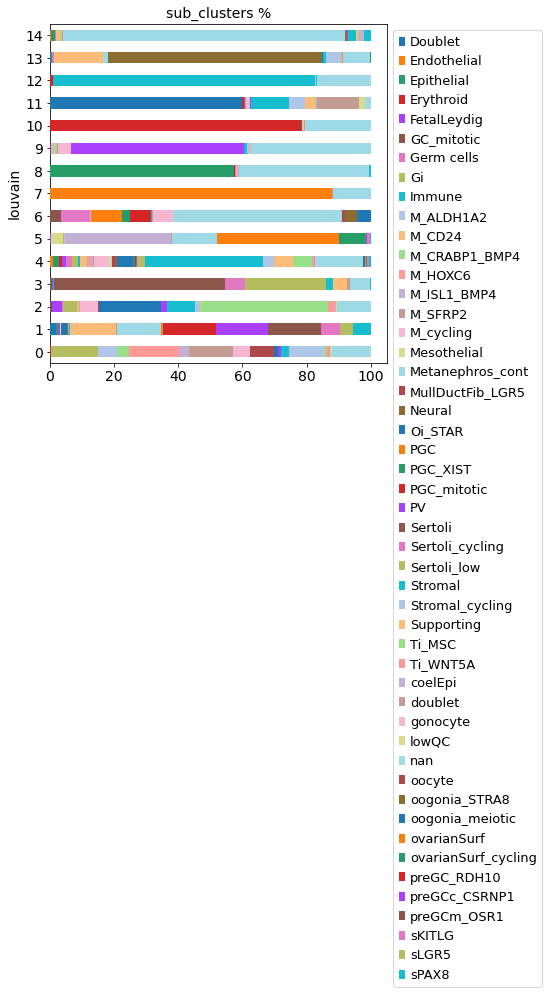

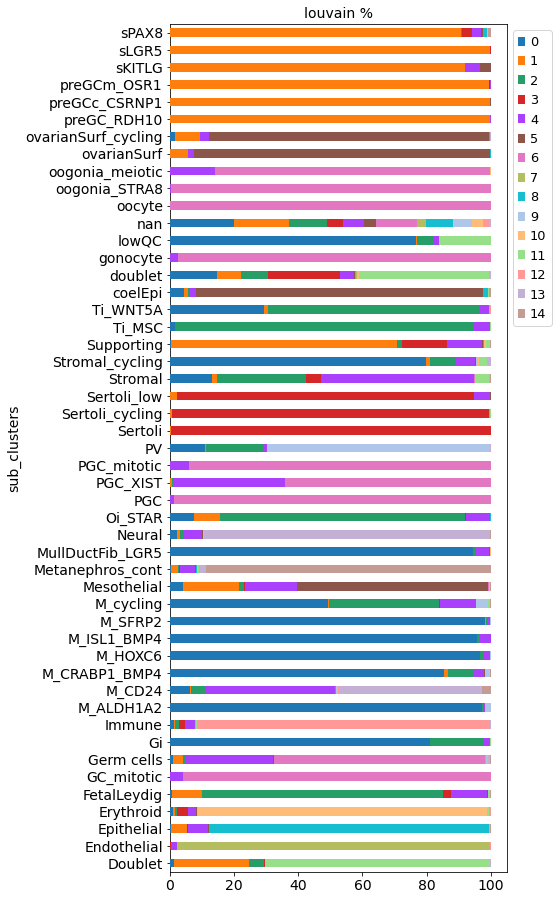

In [62]:
Barplot('sub_clusters', adata, var='louvain', height=6)
Barplot('louvain', adata, var='sub_clusters', height=15)

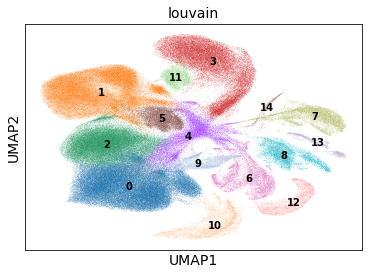

In [63]:
sc.pl.umap(adata, color='louvain',legend_loc='on data',save='_clustering_clusnumbers.pdf' )